In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# ====== LOAD DATA ======
file_path = r"E:\2 Paper MCT\Multi-Domain Paper\full_ae_features.xlsx"
df = pd.read_excel(file_path)

# ====== CLEAN & ENCODE NON-NUMERIC FEATURES ======
# Convert all string or categorical columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# ====== SPLIT FEATURES AND LABEL ======
# Assuming last column is label (change if not)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode labels
y = LabelEncoder().fit_transform(y)
y = to_categorical(y)

# ====== NORMALIZE FEATURES ======
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ====== RESHAPE FOR CNN ======
X = np.expand_dims(X, axis=2)

# ====== TRAIN TEST SPLIT ======
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ====== BUILD CNN MODEL ======
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(2),
    
    Conv1D(128, 3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ====== TRAIN MODEL ======
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# ====== EVALUATE ======
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc * 100:.2f}%")


Epoch 1/100


C:\Users\Muhammad Umar\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7357 - loss: 0.8295 - val_accuracy: 0.8333 - val_loss: 0.9269 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9125 - loss: 0.3806 - val_accuracy: 0.7208 - val_loss: 0.8477 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9482 - loss: 0.2085 - val_accuracy: 0.6500 - val_loss: 0.9182 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9732 - loss: 0.0855 - val_accuracy: 0.6208 - val_loss: 1.0506 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9893 - loss: 0.0306 - val_accuracy: 0.6000 - val_loss: 1.1872 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9929 - loss: 0.0160 - val_accuracy: 0.5833 - val_loss: 1.3454 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9982 - loss: 0.0076 - val_accuracy: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        60
           1       1.00      0.82      0.90        60
           2       0.83      0.98      0.90        60
           3       0.52      1.00      0.69        60

    accuracy                           0.72       240
   macro avg       0.84      0.72      0.66       240
weighted avg       0.84      0.72      0.66       240



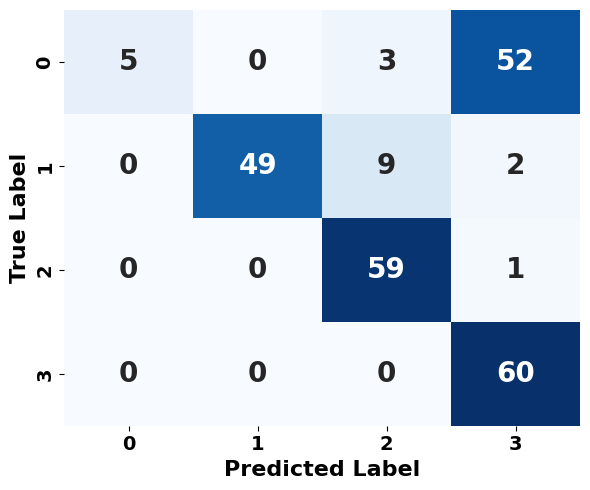

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ====== MAKE PREDICTIONS ======
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# ====== CONFUSION MATRIX ======
cm = confusion_matrix(y_true, y_pred)

# ====== CLASSIFICATION REPORT ======
# Convert numeric labels to strings to avoid TypeError
class_labels = [str(c) for c in le.classes_]
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

# ====== PLOT CONFUSION MATRIX ======
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=False,
    annot_kws={"size": 20, "fontweight": "bold"}
)
plt.xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
